Study ID   Experiment Group               Control Group                  
           m1         sd1        n1         m2         sd2        n2         
Carpenter2017 43.3       14.4       25.0       42.3        14.2       22.0       
Carpenter2017 40.9       12.3       21.0       42.3        14.2       22.0       
Kalkhoran2017 9.2        7.9        408.0      10.9        8.5        380.0      
Tseng2016  13.86      4.3        50.0       14.81       5.51       49.0       
Lee2019    1.05       0.37       75.0       0.96        0.36       75.0       
Jackson2020 12.96      9.61       202.0      12.85       9.08       117.0      
Hajek2019  4.5        2.5        438.0      4.6         2.4        446.0      

Fixed IV MD
Study ID   n       ES[95% CI]         Weight(%)
Carpenter2017 47      1.00[-7.19 9.19]     0.02
Carpenter2017 43      -1.40[-9.33 6.53]     0.02
Kalkhoran2017 788     -1.70[-2.85 -0.55]     0.90
Tseng2016  99      -0.95[-2.90 1.00]     0.31
Lee2019    150     0.09[-0.03 0

C:\Users\tajua\anaconda3\lib\site-packages\PythonMeta\core.py:3546: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([round(_x_tran1(x),2) for x in ax.get_xticks()])


<Figure size 640x480 with 0 Axes>

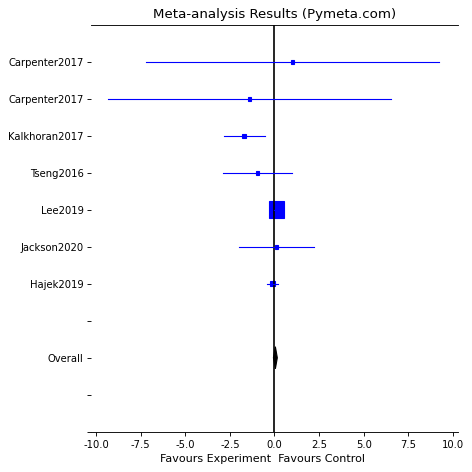

C:\Users\tajua\anaconda3\lib\site-packages\PythonMeta\core.py:3666: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([round(_x_tran1(x),2) for x in ax.get_xticks()])


<Figure size 640x480 with 0 Axes>

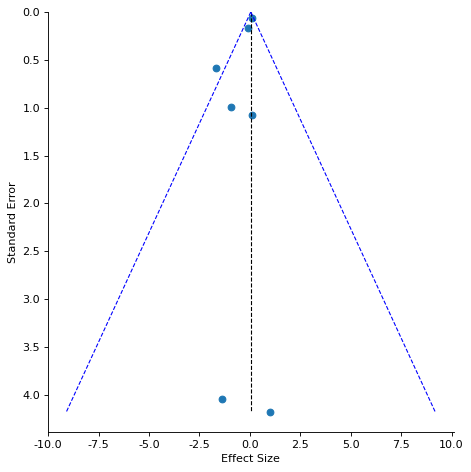

(-0.9006689661544081, -1.5978425598585406, array(0.17096974), 0.5636781675374485, array([-2.34964983,  0.54831189]))


In [1]:
import PythonMeta as PMA
import pandas as pd
import matplotlib.pyplot as plt



def showstudies(studies,dtype):    
    #show continuous data
    if dtype.upper()=="CONT":
        text = "%-10s %-30s %-30s \n"%("Study ID","Experiment Group","Control Group")
        text += "%-10s %-10s %-10s %-10s %-10s %-10s %-10s \n"%(" ","m1","sd1","n1","m2","sd2","n2")
        for i in range(len(studies)):
            text += "%-10s %-10s %-10s %-10s %-10s  %-10s %-10s \n"%(
            studies[i][6],        #study ID
            str(studies[i][0]),   #mean of group1
            str(studies[i][1]),   #SD of group1
            str(studies[i][2]),   #total num of group1
            str(studies[i][3]),   #mean of group2
            str(studies[i][4]),   #SD of group2
            str(studies[i][5])    #total num of group2
            )
        return text
        
    #show dichotomous data
    text = "%-10s %-20s %-20s \n"%("Study ID","Experiment Group","Control Group")
    text += "%-10s %-10s %-10s %-10s %-10s \n"%(" ","e1","n1","e2","n2")
    for i in range(len(studies)):
        text += "%-10s %-10s %-10s %-10s %-10s \n"%(
        studies[i][4],        #study ID
        str(studies[i][0]),   #event num of group1
        str(studies[i][1]),   #total num of group1
        str(studies[i][2]),   #event num of group2
        str(studies[i][3])    #total num of group2
        )
    return text

def showresults(rults):
    text = "%-10s %-6s  %-18s %-10s"%("Study ID","n","ES[95% CI]","Weight(%)\n")    
    for i in range(1,len(rults)):
        text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6.2f\n"%(   # for each study
        rults[i][0],     #study ID
        rults[i][5],     #total num
        rults[i][1],     #effect size
        rults[i][3],     #lower of CI
        rults[i][4],     #higher of CI
        100*(rults[i][2]/rults[0][2])  #weight
        )
    text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6d\n"%(         # for total effect
        rults[0][0],     #total effect size name
        rults[0][5],     #total N (all studies)
        rults[0][1],     #total effect size
        rults[0][3],     #total lower CI
        rults[0][4],     #total higher CI
        100
        )  
    text += "%d studies included (N=%d)\n"%(len(rults)-1,rults[0][5])
    text += "Heterogeneity: Tau\u00b2=%.3f "%(rults[0][12]) if not rults[0][12]==None else "Heterogeneity: "
    text += "Q(Chisquare)=%.2f(p=%s); I\u00b2=%s\n"%(
        rults[0][7],     #Q test value
        rults[0][8],     #p value for Q test
        str(round(rults[0][9],2))+"%")   #I-square value
    text += "Overall effect test: z=%.2f, p=%s\n"%(rults[0][10],rults[0][11])  #z-test value and p-value
    
    return text

def main(stys,settings):
    d = PMA.Data()  #Load Data class
    m = PMA.Meta()  #Load Meta class
    f = PMA.Fig()   #Load Fig class
    
    #You should always tell the datatype first!!!
    d.datatype = settings["datatype"]                #set data type, 'CATE' for binary data or 'CONT' for continuous data
    #studiesstudies = d.getdata(stys)                        #load data
    studies = d.getdata(d.readfile("newciga.txt"))    #get data from a data file, see examples of data files
    #studies = pd.read_csv("new-ciga.csv")
    print(showstudies(studies,d.datatype))           #show studies

    m.subgroup=d.subgroup                            #set the subgroup
    m.datatype=d.datatype                            #set data type for meta-analysis calculating
    m.models = settings["models"]                    #set effect models: 'Fixed' or 'Random'
    m.algorithm = settings["algorithm"]              #set algorithm, based on datatype and effect size
    m.effect = settings["effect"]                    #set effect size:RR/OR/RD for binary data; SMD/MD for continuous data
    results = m.meta(studies)                        #performing the analysis
    print(m.models + " " + m.algorithm + " " + m.effect)
    print (showresults(results))                     #show results table
    plt.savefig("forest1.png", transparent=True)
    f.forest(results)
    plt.show()                         #show forest plot
    plt.savefig("funnel1.png", transparent=True)
    f.funnel(results)
    plt.show()                         #show funnel plot
    print(m.Eggers_test(results))                    #Eggers_test: (Intercept, t-value, p-value, SD  and CI)
    
if __name__ == '__main__':
    """samp_cate=[  #this array can be stored into a data file by lines, and loaded with d.readfile("filename")
    "Fang 2015,15,40,24,37",
    "Gong 2012,10,40,18,35",
    "Liu 2015,30,50,40,50",
    "Long 2012,19,40,26,40",
    "Wang 2003,7,86,15,86",
    "<subgroup>name=short term",
    "Chen 2008,20,60,28,60",
    "Guo 2014,31,51,41,51",
    "Li 2015,29,61,31,60",
    "Yang 2006,21,40,31,40",
    "Zhao 2012,27,40,30,40",
    "<subgroup>name=medium term",
    "#<nototal>",
    " ",
    "#This is a sample of binary data with subgroup.",
    "#Syntax: study name, e1, n1, e2, n2",
    "#e1,n1: events and number of experiment group;",
    "#e2,n2: events and number of control group.",
    "#And you can add a line of <nototal> to hide the Overall result."]"""
    
    samp_cont=[  #this array can be stored into a data file by lines, and loaded with d.readfile("filename")
    "Atmaca 2005, 20.9,  6.0,  15,  27.4,  8.5,  14",
    "Guo 2014,    12.8,  5.2,  51,  11.9,  5.3,  51",
    "Liu 2010,    23.38, 5.86, 35,  24.32, 5.43, 35",
    "Wang 2012,   15.67, 8.78, 43,  18.67, 9.87, 43",
    "Xu 2002,     15.49, 7.16, 50,  21.72, 8.07, 50",
    "Zhao 2012,   12.8,  5.7,  40,  13.0,  5.2,  40",
    " ",
    "#This is a sample of continuous data.",
    "#Input one study in a line;",
    "#Syntax: study name, m1, sd1, n1, m2, sd2, n2",
    "#m1, sd1, n1: mean, SD and number of experiment group;",
    "#m2, sd2, n2: mean, SD and number of control group."]
    
    #sample 1: dichotomous data
    """
    settings={
    "datatype":"CATE",  #for CATEgorical/count/binary/dichotomous data
    "models":"Fixed",             #models: Fixed or Random
    "algorithm":"MH",             #algorithm: MH, Peto or IV
    "effect":"RR"}                #effect size: RR, OR, RD
   #main(samp_cate,settings)"""
    
    #sample 2: continuous data
    settings={
    "datatype":"CONT",  #for CONTinuous data
    "models":"Fixed",             #models: Fixed or Random
    "algorithm":"IV",             #algorithm: IV
    "effect":"MD"}                #effect size: MD, SMD
    main(samp_cont,settings)